# A. Exploratory Data Analysis: Prime Indian Diabetes dataset

**Objective**

Predict whether patient has diabetes or not based on different features.
n

**Data Set Information**

The dataset includes 769 rows and 7 columns containing different attributes of a person.


**Attribute Information**
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)

- DiabetesPedigreeFunction:Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 0. Required Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## A.1. Problem Statement

Predict whether a person is diabetic positive or not based on different features.

## A.2. Data Collection

In [12]:
df = pd.read_csv('../Diabetes-Predictor/pime_indians_diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## A.3. Data Preprocessing

In [15]:
df.shape

(768, 9)

we got 768 rows and 9 columns or features

### A.3.1 Removing Null values

Visualizing the null values

<AxesSubplot:>

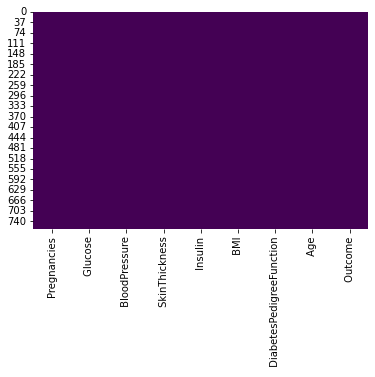

In [16]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Fetching the indexes of the null values

In [17]:
null_val_indexes = [i for i, row in df.iterrows() if row.isnull().any()]

In [18]:
null_val_indexes

[]

**Observation:** We can observe that we have no column in any of the rows with null value.

### A.3.2 Removing Nan values

Visualizing the Nan values

<AxesSubplot:>

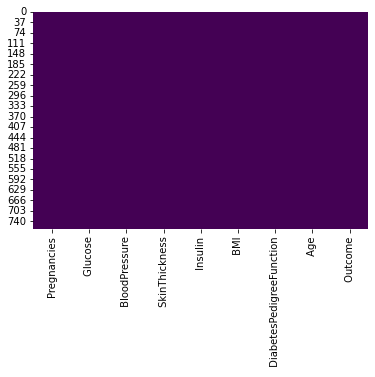

In [21]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Fetching the indexes of Nan Values

In [23]:
nan_val_indexes = [i for i, row in df.iterrows() if row.isna().any()]

In [24]:
nan_val_indexes

[]

**Observation:** We can observe that we have no column in any of the rows with NaN value.

### A.3.3 Fixing the column names

Remove spaces from the colum heads

In [29]:
df.columns

Index(['Pregnancies', ' Glucose', ' BloodPressure', ' SkinThickness',
       ' Insulin', ' BMI', ' DiabetesPedigreeFunction', ' Age', ' Outcome'],
      dtype='object')

Their are spaces in column names so we need to remove them but before that we need to convert all the columns to string type first.

In [30]:
df = df.astype(str)

In [32]:
df.columns = [col_name.strip() for col_name in df.columns]

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### A.3.4 Fixing the data types of columns

Currently data types of respective columns are as follows

In [35]:
df.dtypes

Pregnancies                 object
Glucose                     object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                         object
DiabetesPedigreeFunction    object
Age                         object
Outcome                     object
dtype: object

We will change the data types of columns to our custom type as we have previously altered them.

In [37]:
custom_dtypes = {'Pregnancies': 'int64', 'Glucose': 'int64', 'BloodPressure': 'int64', 'SkinThickness': 'int64', 'Insulin': 'int64', 'BMI': 'float64', 'DiabetesPedigreeFunction': 'float64', 'Age': 'int64', 'Outcome': 'object'}

df = df.astype(custom_dtypes)

In [38]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

### A.4 Detection and removal of outliers

### A.4.1 Detecting outliers by Box plot

We can only detect outliers in numerical features.

In [45]:
num_columns = [column for column in df.columns if df[column].dtypes != 'O']

In [46]:
num_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

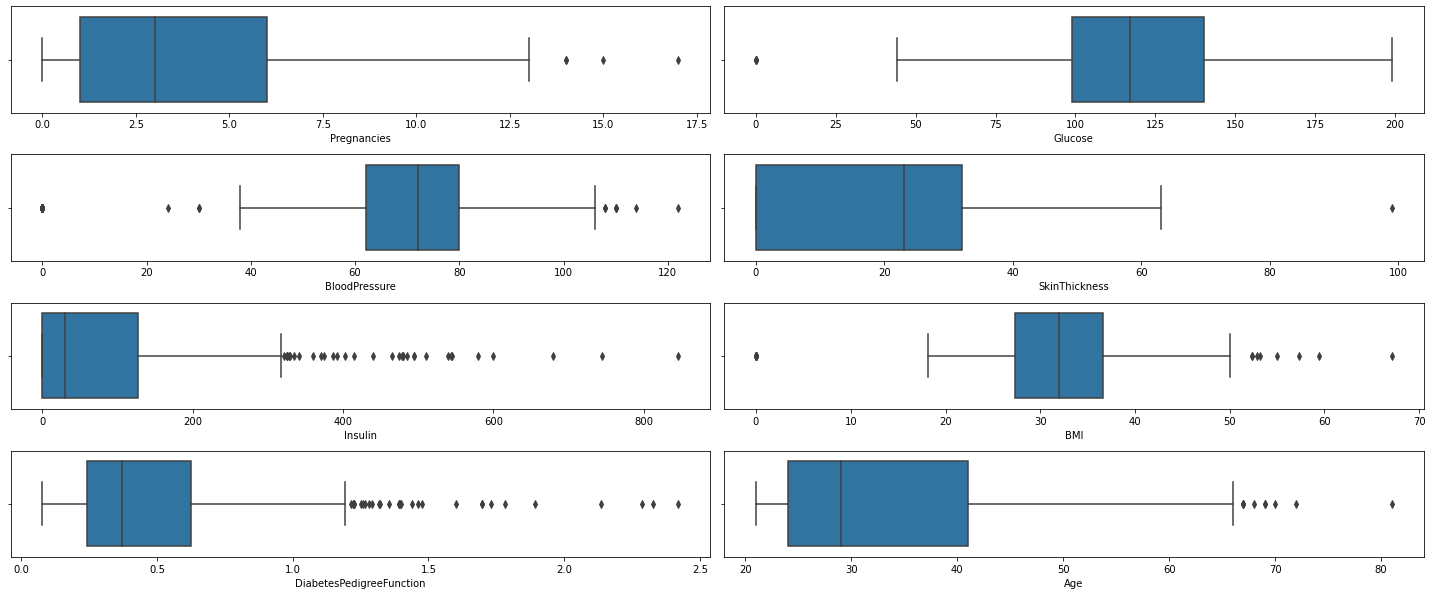

In [47]:
n = 1
plt.figure(figsize=(20, 10))
for column in num_columns:
    plt.subplot(5, 2, n)
    n+= 1
    sns.boxplot(df[column])
    plt.tight_layout()

### A.4.2 Detecting outliers by z-score

In [48]:
z_scores = []
for column in num_columns:
    z_scores.append(np.abs(stats.zscore(df[column])))

In [49]:
z_scores

[0      0.639947
 1      0.844885
 2      1.233880
 3      0.844885
 4      1.141852
          ...   
 763    1.827813
 764    0.547919
 765    0.342981
 766    0.844885
 767    0.844885
 Name: Pregnancies, Length: 768, dtype: float64,
 0      0.848324
 1      1.123396
 2      1.943724
 3      0.998208
 4      0.504055
          ...   
 763    0.622642
 764    0.034598
 765    0.003301
 766    0.159787
 767    0.873019
 Name: Glucose, Length: 768, dtype: float64,
 0      0.149641
 1      0.160546
 2      0.263941
 3      0.160546
 4      1.504687
          ...   
 763    0.356432
 764    0.046245
 765    0.149641
 766    0.470732
 767    0.046245
 Name: BloodPressure, Length: 768, dtype: float64,
 0      0.907270
 1      0.530902
 2      1.288212
 3      0.154533
 4      0.907270
          ...   
 763    1.722735
 764    0.405445
 765    0.154533
 766    1.288212
 767    0.656358
 Name: SkinThickness, Length: 768, dtype: float64,
 0      0.692891
 1      0.692891
 2      0.692891
 3   

Lets set the threshold to 3 and identify the outliers.

In [50]:
threshold = 3 
for z in z_scores:
    print(np.where(z > threshold))

(array([ 88, 159, 298, 455], dtype=int64),)
(array([ 75, 182, 342, 349, 502], dtype=int64),)
(array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
       332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
       535, 589, 601, 604, 619, 643, 697, 703, 706], dtype=int64),)
(array([579], dtype=int64),)
(array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
       584, 645, 655, 695, 753], dtype=int64),)
(array([  9,  49,  60,  81, 145, 177, 371, 426, 445, 494, 522, 673, 684,
       706], dtype=int64),)
(array([  4,  45,  58, 228, 330, 370, 371, 395, 445, 593, 621], dtype=int64),)
(array([123, 453, 459, 666, 684], dtype=int64),)


**Observation:** 

Here we can observe the row numbers where value of z-score is greater than threshold for respective numerical features.

Now we will calculate the IQR for each of numerical features.

In [51]:
feature_IQRs = []

for column in num_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    feature_IQRs.append(IQR)

In [52]:
for column, IQR in zip(num_columns, feature_IQRs):
    print(column + '------------->' + str(IQR))

Pregnancies------------->5.0
Glucose------------->41.25
BloodPressure------------->18.0
SkinThickness------------->32.0
Insulin------------->127.25
BMI------------->9.3
DiabetesPedigreeFunction------------->0.38249999999999995
Age------------->17.0


We can also calculate lower_fence and upper_fence using the IQR to remove the outliers in later stage.

lower_fence = Q1 - 1.5 * IQR

higher_fence = Q3 + 1.5 * IQR

### A.4.3 Removing outliers by z-score

Remove outliers from all the numerical column using z score.

In [58]:
df_processed = df[np.abs(stats.zscore(df[num_columns]) < 3).all(axis=1)]

In [66]:
df_processed.shape

(729, 9)

## A.5 Feature segregation

Categorical Features in dataset are 

In [67]:
cat_features = [feature for feature in df.columns if df_processed[feature].dtype == 'O']

In [68]:
cat_features

['Outcome']

Numerical features in dataset are

In [69]:
num_features = [feature for feature in df.columns if df_processed[feature].dtype != 'O']

In [70]:
num_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Lets make data frame of categorical and numerical data frame for future references

In [71]:
cat_df = df_processed.filter(cat_features)

In [72]:
num_df = df_processed.filter(num_features)

## A.6 Bivariate Analysis

### A.6.1 Correaltion of numerical features

<AxesSubplot:>

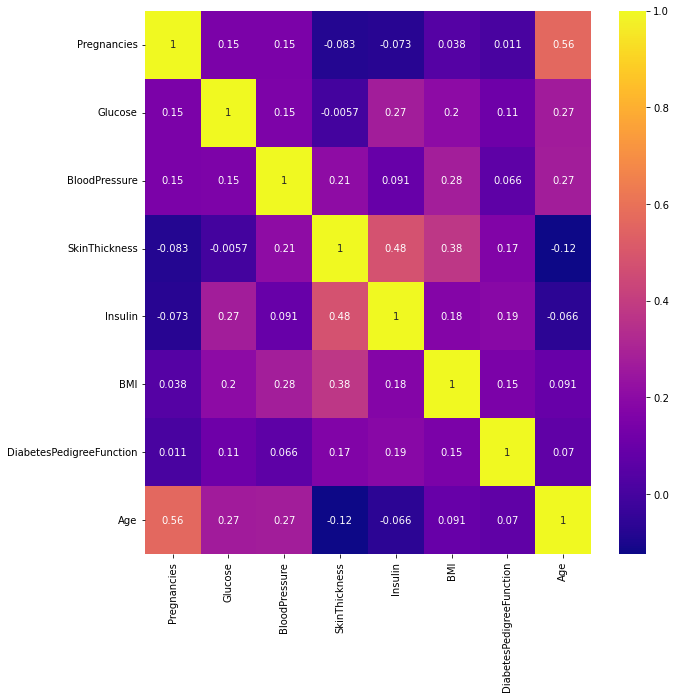

In [74]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_processed.corr(), cbar=True, annot=True, cmap='plasma')

**Observation:**

We can observe that:

- Their is high positive correlation between:
     - Pregnancies and age
     - Skin Thickness and Insulin 
     - Skin Thickness and BMI

- Their is moderate correlation between:
     - Glucose and Insulin
     - Glucose and Age
     - Blood Pressure and Skin Thickness
     - Blood Pressure and BMI
     - Blood Pressure and Age

- Their is negative correlation between:
     - Pregnancies and Skin Thickness
     - Skin Thickness and Age
     - Age and Insulin

### A.6.2 Relation between Categorical features

In [80]:
cat_df.value_counts()

Outcome
0          483
1          246
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Outcome'>

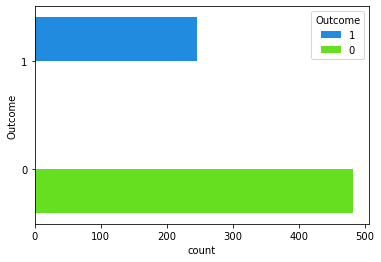

In [76]:
sns.countplot(data=cat_df, y='Outcome', hue='Outcome', palette='gist_rainbow_r')

**Observations:** In our dataset Diabetes negative is encoded as 0 and represented by green and Diabetes positive is encoded as 1 and represented by blue.

- Number of Diabetes positive: 246
- Number of Diabetes negatives: 483

## A.7 Univariate Analysis

Lets check the distribution of the features

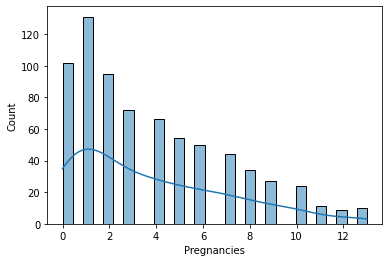

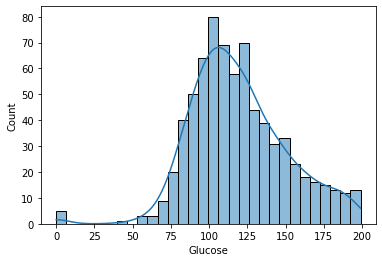

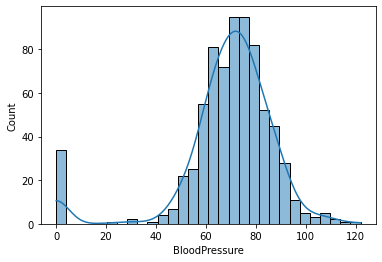

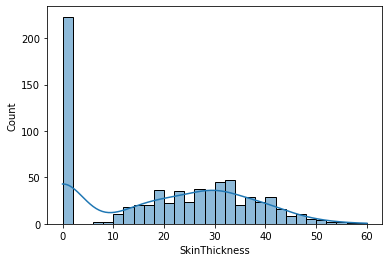

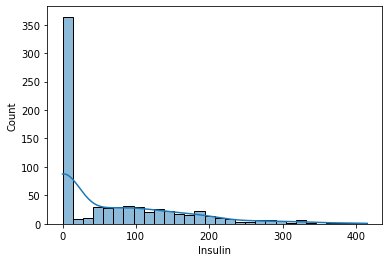

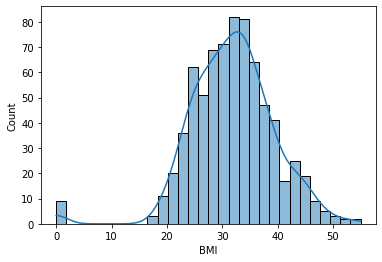

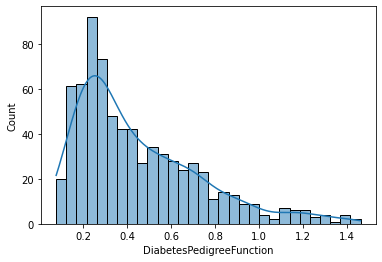

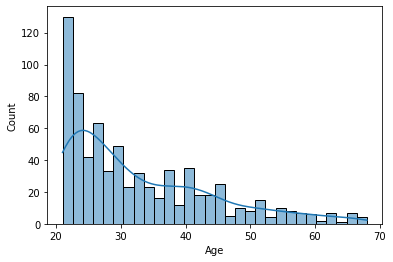

In [81]:
for column in num_columns:
    sns.histplot(data=num_df, x=column, kde=True, bins=30)
    plt.show()

**Observations:**

- Pregnancies, Age, DiabetesPedigreeFunction are right skewed normally distributed.
- BMI, SkinThickness, BloodPressure and Glucose are following Gaussian Distribution
- Insulin is not following any distribution correctly.

Lets see the relation between each of the features with help of strip plot

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

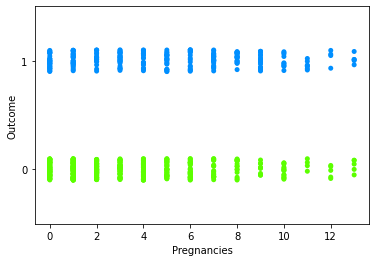

In [85]:
sns.stripplot(data=df_processed, x='Pregnancies', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

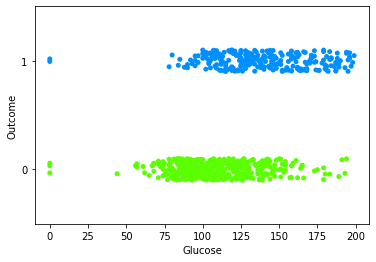

In [86]:
sns.stripplot(data=df_processed, x='Glucose', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome'>

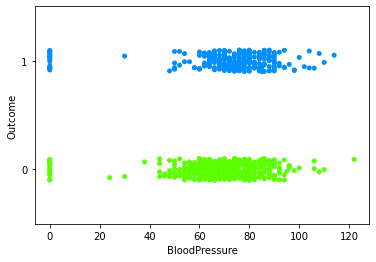

In [87]:
sns.stripplot(data=df_processed, x='BloodPressure', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome'>

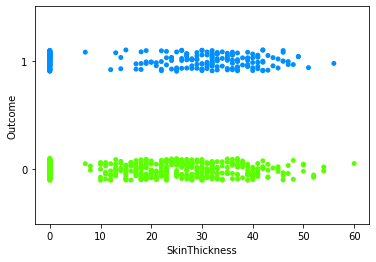

In [88]:
sns.stripplot(data=df_processed, x='SkinThickness', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

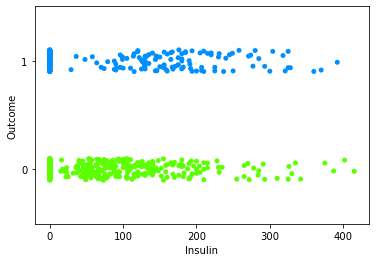

In [89]:
sns.stripplot(data=df_processed, x='Insulin', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

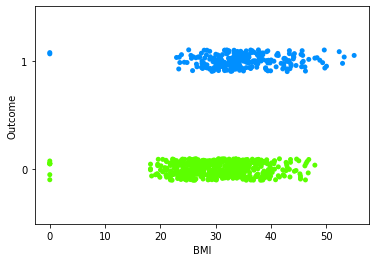

In [90]:
sns.stripplot(data=df_processed, x='BMI', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

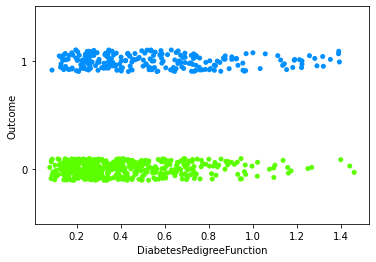

In [92]:
sns.stripplot(data=df_processed, x='DiabetesPedigreeFunction', y='Outcome', palette='gist_rainbow_r')

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

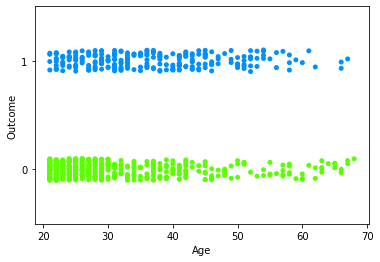

In [91]:
sns.stripplot(data=df_processed, x='Age', y='Outcome', palette='gist_rainbow_r')

**Observations:**

- Diabetes negative people has Insulin within range of 20 to 200.
- For BMI greater than 20 and less than 50 most cases of Diabetes.
- For age less than 45 their are more cases of diabetes. 

# B. Model Building

In [6]:
y = dataset[8]#col 8 has value of patient has daibaetes or not so this is our target i.e y

In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [8]:
X = dataset[[0,1,2,3,4,5,6,7]]

In [9]:
from keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
model.get_config()# here we can see rn model is empty, it is like empty box

{'name': 'sequential', 'layers': []}

In [12]:
#to add layer we use Dense function : Multiple layer is called dense
from keras.layers import Dense

In [13]:
model.add(Dense(units=4, #here units=4 -> number of neurons,
                kernel_initializer = "zeros", # Kernel_initializer="zeros" -> initialize weight as 0,
                bias_initializer = "zeros", # bias_initialize= "zeros" -> initialize bias as zero
                input_dim=8, #input_dim=8 , dim stands for dimention -> 8 is number of featrue we have
                activation = "relu" # relu[ Rectified Linear Unit ] is a function that give value in b/w 0 and infinity
               ))  


Now our one layer is created!!

In [14]:
model.get_config() # now we can see here that we have created the layer with 8 feature and 4 neuron

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [15]:
#To check how many layer we have
model.get_layer #here we can see we have only one layer

<bound method Model.get_layer of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B24FADAD48>>

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


It shows we have one layer and it will give 4 output and 36 parameter(8[feature] * 4[neurons] + 4[bias] == 36 parameter)

In [17]:
# add one more layer
# we dont need to specify the dimention as it will automatically detect
model.add(Dense(units=4,
               activation ="relu",
               kernel_initializer = "zeros",
               bias_initializer = "zeros"
               ))

Now we have created 2nd layer

In [18]:
model.get_layer

<bound method Model.get_layer of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B24FADAD48>>

In [19]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'ke

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


dense_1 is 2nd layer it shows it will give 4 output and has 20 parameter( 4[1st layer neuron] * 4[neurons] + 4[bias])

In [21]:
# Last layer: it usually have single neuron

model.add(Dense(units=1,
               activation="sigmoid", # sigmoid function -> gives output in 0 and 1
               kernel_initializer="zeros",
               bias_initializer = "zeros" 
               ))

last layer is created which will give output : output layer

In [22]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'ke

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


here dense_2 is our 3rd layer which will give output-> 1 (either 0 or 1 ) and has paramete

here we can see total 61 parameter it will find imagine in big data , image processing millions of paramenter they will find and it takes lots of computing power

In [24]:
#After model creation we need to compile the model to tell what is our loss funtion and which optimiser we are going to use

from keras.optimizers import Adam

In [25]:
model.compile(optimizer = Adam(), loss="binary_crossentropy")
#binary_crossentropy is a loss funciton used in binary classification works in 0 and 1.

In [26]:
model.fit(X,y) #here we can see the loss we have

24/24 [==============================] - 0s 651us/step - loss: 0.6916


In [27]:
#if we are not happy with the weight and bias then we can go back and reset the weight and bias and again train model
# this is called backpropogation
# epochs is use to set how many times we need to go back


model.fit(X,y, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 610us/step - loss: 0.6886
Epoch 2/100
24/24 [==============================] - 0s 699us/step - loss: 0.6857
Epoch 3/100
24/24 [==============================] - 0s 665us/step - loss: 0.6831
Epoch 4/100
24/24 [==============================] - 0s 706us/step - loss: 0.6804
Epoch 5/100
24/24 [==============================] - 0s 708us/step - loss: 0.6781
Epoch 6/100
24/24 [==============================] - 0s 744us/step - loss: 0.6758
Epoch 7/100
24/24 [==============================] - 0s 737us/step - loss: 0.6737
Epoch 8/100
24/24 [==============================] - 0s 666us/step - loss: 0.6719
Epoch 9/100
24/24 [==============================] - 0s 678us/step - loss: 0.6698
Epoch 10/100
24/24 [==============================] - 0s 701us/step - loss: 0.6682
Epoch 11/100
24/24 [==============================] - 0s 655us/step - loss: 0.6666
Epoch 12/100
24/24 [==============================] - 0s 658us/step - loss: 0.6651
Epoch 13/100


Here we can see epochs train the model 100 times and we can see loss is decreased

In [28]:
model.save("dia_model.h5")